In [2]:
import pandas as pd
from datetime import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('dataset_SCL.csv')
df

C:\Users\Diego Salcedo\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3433: DtypeWarning: Columns (1,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


In [4]:
# Tip para obtener nombres de columnas más rápido
num_cols = ['DIA','MES','AÑO']
cat_cols = list(set(df.columns).difference(num_cols))
print(f'Variables numéricas: {num_cols}')
print(f'Variables categóricas: {cat_cols}')

Variables numéricas: ['DIA', 'MES', 'AÑO']
Variables categóricas: ['Fecha-O', 'Emp-O', 'Fecha-I', 'OPERA', 'Des-I', 'Vlo-I', 'Emp-I', 'SIGLADES', 'DIANOM', 'Ori-I', 'Ori-O', 'Vlo-O', 'Des-O', 'TIPOVUELO', 'SIGLAORI']


ANÁLISIS DE DISTRIBUCIÓN DE VARIABLES NUMÉRICAS

Es importante resaltar que las presentes variables numéricas presentes en la tabla son en realidad causicuantitativa (o variable cualitativa ordinal), ya que no podemos sumar DÍA con DÍA, MES con MES, o AÑO con AÑO. Lo cual si ocurriría con variables cuantitativas como Costo del pasaje.

Nota: No se considera la variable día en el análisis

1.-DISTRIBUCIÓN SOBRE LA VARIABLE MES


In [5]:
df['MES'].value_counts(dropna=False).sort_values()

6     4981
4     5020
5     5240
3     5482
2     5561
9     5610
8     5744
7     5992
10    6032
11    6080
1     6108
12    6356
Name: MES, dtype: int64

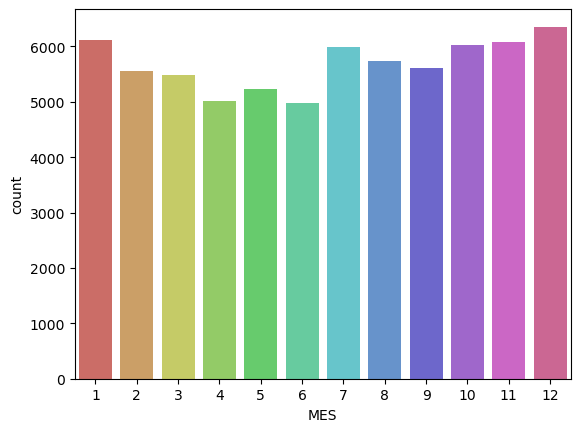

<Figure size 640x480 with 0 Axes>

In [6]:
sns.countplot(x='MES',data = df, palette = 'hls')
plt.show()
plt.savefig('count_plot')

Vemos que la muestra analizada no sesga el análisis por un factor estacional (factor estacional ocurre cuando la unidad de tiempo es menor a un año, es decir, día o mes)


2.-DISTRIBUCIÓN SOBRE LA VARIABLE AÑO

In [7]:
df['AÑO'].value_counts(dropna=False).sort_values()

2018        2
2017    68204
Name: AÑO, dtype: int64

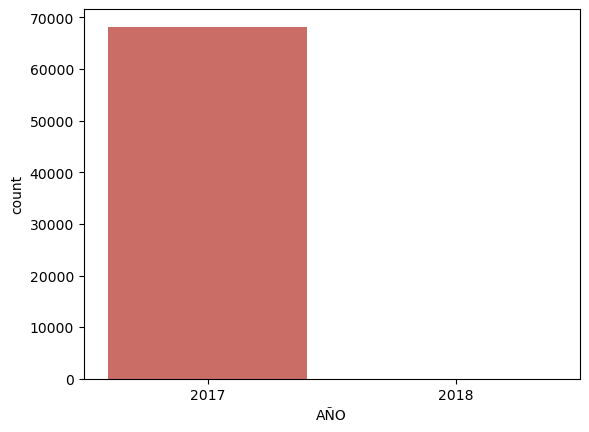

<Figure size 640x480 with 0 Axes>

In [8]:
sns.countplot(x='AÑO',data = df, palette = 'hls')
plt.show()
plt.savefig('count_plot')

La data nos muestra el comportamiento del año 2017, lo cual es un punto muy relevante a considerar en este análisis, ya que en dicho momento los problemas con los que lidiaban las aerolíneas eran distintos a los actuales.

ANÁLISIS DE DISTRIBUCIÓN DE VARIABLES CATEGÓRICAS

1.-DISTRIBUCIÓN SOBRE LA VARIABLE DIA DE LA SEMANA

In [9]:
df['DIANOM'].value_counts(dropna=False).sort_values()

Sabado        8352
Martes        9662
Miercoles     9722
Domingo       9796
Lunes        10131
Jueves       10251
Viernes      10292
Name: DIANOM, dtype: int64

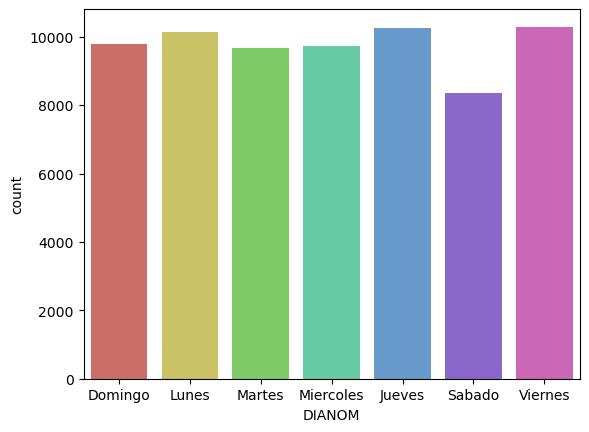

<Figure size 640x480 with 0 Axes>

In [10]:
sns.countplot(x='DIANOM',data = df, palette = 'hls')
plt.show()
plt.savefig('count_plot')

Apriori puedo pensar que la variable 'día de la semana de operación del vuelo' puede ser clave para predecir la probabilidad de retraso de un vuelo.

Podría estar relacionada a:

SIN DISPONIBILIDAD DE ESTACIONAMIENTO DEBIDO A ACTIVIDAD PROPIA DE LA AEROLINEA

CONGESTION EN AREA DE CHECK-IN

2.-DISTRIBUCIÓN SOBRE LA VARIABLE AEROLINEA DE VUELO OPERADO                 ('Emp-O')
3.-DISTRIBUCIÓN SOBRE LA VARIABLE AEROLINEA DE VUELO PROGRAMADO              ('Emp-I')
4.-DISTRIBUCIÓN SOBRE LA VARIABLE NOMBRE DE AEROLINEA QUE OPERA              ('OPERA')

4.-DISTRIBUCIÓN SOBRE LA VARIABLE FECHA Y HORA PROGRAMADA DEL VUELO       ('Fecha-I')
4.-DISTRIBUCIÓN SOBRE LA VARIABLE FECHA Y HORA OPERADO DEL VUELO          ('Fecha-O)

5.-DISTRIBUCIÓN SOBRE LA VARIABLE CODIGO DE CIUDAD DE DESTINO PROGRAMADO  ('Des-I')
12.-DISTRIBUCIÓN SOBRE LA VARIABLE NUMERO DE VUELO PROGRAMADO              ('Des-O')

6.-DISTRIBUCIÓN SOBRE LA VARIABLE NUMERO DE VUELO PROGRAMADO              ('Vlo-I')



8.-DISTRIBUCIÓN SOBRE LA VARIABLE NUMERO DE VUELO PROGRAMADO              ('SIGLADES')

9.-DISTRIBUCIÓN SOBRE LA VARIABLE NUMERO DE VUELO PROGRAMADO              ('DIANOM')

10.-DISTRIBUCIÓN SOBRE LA VARIABLE NUMERO DE VUELO PROGRAMADO              ('Ori-I')

11.-DISTRIBUCIÓN SOBRE LA VARIABLE NUMERO DE VUELO PROGRAMADO              ('Ori-O')

11.-DISTRIBUCIÓN SOBRE LA VARIABLE NUMERO DE VUELO PROGRAMADO              ('Vlo-O')



13.-DISTRIBUCIÓN SOBRE LA VARIABLE NUMERO DE VUELO PROGRAMADO              ('TIPOVUELO')

14.-DISTRIBUCIÓN SOBRE LA VARIABLE NUMERO DE VUELO PROGRAMADO              ('SIGLAORI')


In [11]:
df['Emp-O'].value_counts(dropna=False).sort_values()

TPU        2
48O       10
56R       17
PUE       49
AUT       77
QFA      195
BAW      205
LAP      219
KLM      251
AZA      259
ONE      279
UAL      335
AMX      351
LRC      357
DAL      358
AFR      358
IBE      362
LNE      374
DSM      493
ACA      565
AAL      757
GLO      806
AVA      885
JAT     1095
LPE     1214
JMR     1647
CMP     1850
ARG     1946
TAM     3046
SKU    14298
LXP    14558
LAN    20988
Name: Emp-O, dtype: int64

In [21]:
df['OPERA'].value_counts(dropna=False).sort_values()

Plus Ultra Lineas Aereas       49
Austral                        74
Lacsa                          92
Qantas Airways                195
British Airways               205
K.L.M.                        251
Alitalia                      259
Oceanair Linhas Aereas        279
United Airlines               335
Aeromexico                    351
Air France                    358
Delta Air                     358
Iberia                        362
Air Canada                    565
American Airlines             757
Gol Trans                     806
JetSmart SPA                 1095
Avianca                      1152
Latin American Wings         1674
Copa Air                     1850
Aerolineas Argentinas        1949
Sky Airline                 14298
Grupo LATAM                 40892
Name: OPERA, dtype: int64

In [23]:
df['TIPOVUELO'].value_counts(dropna=False).sort_values()

I    31240
N    36966
Name: TIPOVUELO, dtype: int64

Se procede a hacer análisis bivariados, ya que no tiene mucho sentido analizar independientemente variables relacionadas a Fechas programadas y operadas de vuelos.

In [28]:
df.groupby(['TIPOVUELO', 'OPERA']).OPERA.agg([len])

len
TIPOVUELO OPERA                          
I         Aerolineas Argentinas      1949
          Aeromexico                  351
          Air Canada                  565
          Air France                  358
          Alitalia                    259
          American Airlines           757
          Austral                      74
          Avianca                    1152
          British Airways             205
          Copa Air                   1850
          Delta Air                   358
          Gol Trans                   806
          Grupo LATAM               17149
          Iberia                      362
          JetSmart SPA                  6
          K.L.M.                      251
          Lacsa                        92
          Latin American Wings       1038
          Oceanair Linhas Aereas      279
          Plus Ultra Lineas Aereas     49
          Qantas Airways              195
          Sky Airline                2800
          United Airlines             335
N         Grupo LATAM               23743
          JetSmart SPA               1089
          Latin American Wings        636
          Sky Airline               11498

EXCLUYENDO CASOS  (0.03%) DONDE EL DESTINO PROGRAMADO ES DIFERENTE AL DESTINO DE OPERACIÓN  26 CASOS VS  68 180

In [32]:
df_exclusion = df.loc[
   (
    (df['Des-I'] == 'KIAH') & (df['Des-O'] == 'KIAD') & (df['SIGLADES'] == 'Washington')
   ) |
   (
    (df['Des-I'] == 'KJFK') & (df['Des-O'] == 'KMIA') & (df['SIGLADES'] == 'Miami')
   ) |
   (
    (df['Des-I'] == 'SABE') & (df['Des-O'] == 'SAEZ') & (df['SIGLADES'] == 'Buenos Aires')
   ) |
   (
    (df['Des-I'] == 'SAEZ') & (df['Des-O'] == 'SABE') & (df['SIGLADES'] == 'Buenos Aires')
   ) | 
   (
    (df['Des-I'] == 'SBGR') & (df['Des-O'] == 'SBGL') & (df['SIGLADES'] == 'Rio de Janeiro')
   ) |
   (
    (df['Des-I'] == 'SCBA') & (df['Des-O'] == 'SCTE') & (df['SIGLADES'] == 'Puerto Montt')
   ) |

   (
    (df['Des-I'] == 'SCCI') & (df['Des-O'] == 'SCTE') & (df['SIGLADES'] == 'Puerto Montt')
   ) | 
   (
    (df['Des-I'] == 'SCFA') & (df['Des-O'] == 'SCCF') & (df['SIGLADES'] == 'Calama')
   ) |
   (
    (df['Des-I'] == 'SCIE') & (df['Des-O'] == 'SCQP') & (df['SIGLADES'] == 'Temuco')
   ) |

   (
    (df['Des-I'] == 'SCIE') & (df['Des-O'] == 'SCTE') & (df['SIGLADES'] == 'Puerto Montt')
   ) | 
   (
    (df['Des-I'] == 'SCTE') & (df['Des-O'] == 'SCCI') & (df['SIGLADES'] == 'Punta Arenas')
   ) |
   (
    (df['Des-I'] == 'SCTE') & (df['Des-O'] == 'SCQP') & (df['SIGLADES'] == 'Temuco')
   ) | 
   (
    (df['Des-I'] == 'SEGU') & (df['Des-O'] == 'SABE') & (df['SIGLADES'] == 'Buenos Aires')
   ) |
   (
    (df['Des-I'] == 'YSSY') & (df['Des-O'] == 'YMML') & (df['SIGLADES'] == 'Melbourne')
   )   ]

df1mi = pd.MultiIndex.from_frame(df_exclusion)
df2mi = pd.MultiIndex.from_frame(df)
dfdiff = df2mi.difference(df1mi).to_frame().reset_index(drop=True)
dfdiff.shape

(68180, 18)

In [34]:
dfdiff.rename(columns = {'Fecha-I':'programada', 'Fecha-O':'operacion'}, inplace = True)
dfdiff["fecha_programada"] = (dfdiff["programada"].str.split(" ", n = 1, expand = True))[0]
dfdiff["hora_programada"] = (dfdiff["programada"].str.split(" ", n = 1, expand = True))[1]
dfdiff["fecha_operacion"] = (dfdiff["operacion"].str.split(" ", n = 1, expand = True))[0]
dfdiff["hora_operacion"] = (dfdiff["operacion"].str.split(" ", n = 1, expand = True))[1]
dfdiff["casuistica"] = np.where(dfdiff["fecha_programada"]  == dfdiff["fecha_operacion"] , np.where(dfdiff["hora_programada"]  == dfdiff["hora_operacion"] , 'match',  'no_match_hora')   , 'fecha_distinta' )
dfdiff["casuistica_dicotomica"] = dfdiff['casuistica'].apply(lambda x: x if x in ('no_match_hora', 'fecha_distinta') else 'match')
dfdiff.loc[(dfdiff['casuistica'] == 'no_match_hora') | (dfdiff['casuistica'] == 'fecha_distinta'), 'casuistica_dicotomica'] = 'no_match'  

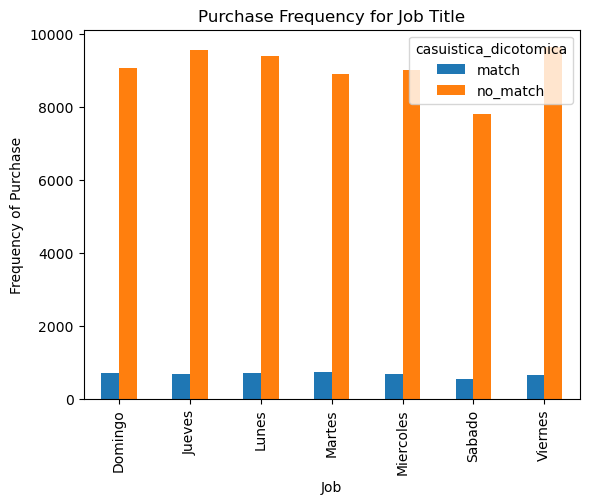

In [36]:
%matplotlib inline
pd.crosstab(dfdiff.DIANOM,dfdiff.casuistica_dicotomica).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

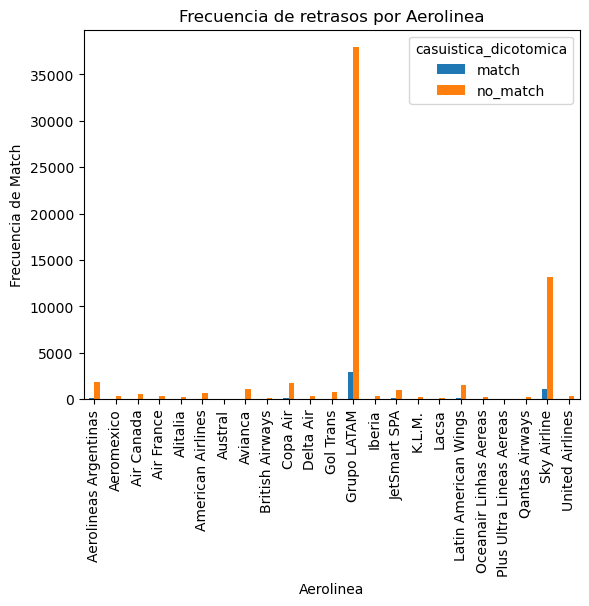

In [47]:
%matplotlib inline
pd.crosstab(dfdiff.OPERA,dfdiff.casuistica_dicotomica).plot(kind='bar')
plt.title('Frecuencia de retrasos por Aerolinea')
plt.xlabel('Aerolinea')
plt.ylabel('Frecuencia de Match')
plt.savefig('')

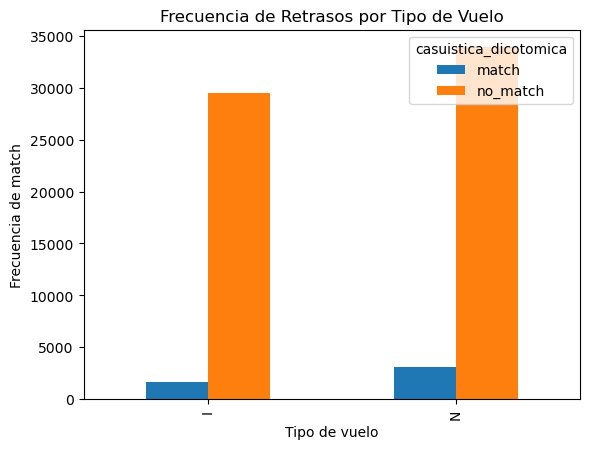

In [48]:
%matplotlib inline
pd.crosstab(dfdiff.TIPOVUELO,dfdiff.casuistica_dicotomica).plot(kind='bar')
plt.title('Frecuencia de Retrasos por Tipo de Vuelo')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Frecuencia de match')
plt.savefig('')

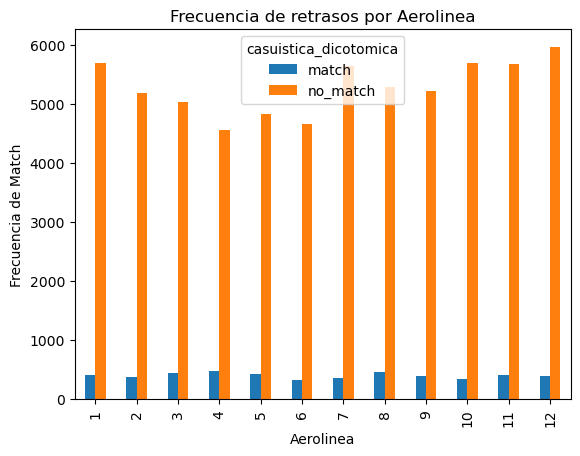

In [49]:
%matplotlib inline
pd.crosstab(dfdiff.MES,dfdiff.casuistica_dicotomica).plot(kind='bar')
plt.title('Frecuencia de retrasos por Aerolinea')
plt.xlabel('Aerolinea')
plt.ylabel('Frecuencia de Match')
plt.savefig('')

In [89]:
df.rename(columns = {'Fecha-I':'programada', 'Fecha-O':'operacion'}, inplace = True)
type(df['operacion'])

pandas.core.series.Series

In [ ]:
mydf = df['operacion'].to_frame('values')
mydf

In [ ]:
df['operacion'] = df['operacion'].astype('str')
df['operacion'] = df.operacion.apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
df['operacion'] = df.operacion.apply(lambda x: datetime.strftime(x,'%Y-%m-%d %H:%M:%S')) # datetime a string - como quiero visualiza
df['operacion'] = df.operacion.apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S').date())
#df['programada'] = df.programada.apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))

pandas.core.series.Series

pandas.core.series.Series

In [ ]:
    df['published'] = df['published'].astype('str') #convertir variables string
    df['published'] = df['published'].str.split('.', expand=True)[0]
    df['published'] = df.published.apply(lambda x: datetime.strptime(x,'%Y-%m-%dT%H:%M:%S')) #darle formato - datetime
    df['published'] = df.published.apply(lambda x: datetime.strftime(x,'%Y-%m-%d')) # datetime a string - como quiero visualiza
    df['published'] = df.published.apply(lambda x: datetime.strptime(x,'%Y-%m-%d').date())


In [28]:
##### VALIDACIONES
#  'Ori-I'   'Ori-O'   'SIGLAORI'
#  'Des-I'   'Des-O'   'SIGLADES'
#  'Vlo-I'   'Vlo-O'
#  'Fecha-I' 'Fecha-O'
#  'Emp-I'    'Emp-O'
#result = df.groupby(['Ori-I','Ori-O','SIGLAORI','Des-O']).count()
result = df.groupby(['Ori-I','Ori-O','SIGLAORI']).count()
result

,,,Fecha-I,Vlo-I,Des-I,Emp-I,Fecha-O,Vlo-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLADES
Ori-I,Ori-O,SIGLAORI,,,,,,,,,,,,,,,
SCEL,SCEL,Santiago,68206,68206,68206,68206,68206,68205,68206,68206,68206,68206,68206,68206,68206,68206,68206


In [29]:
result = df.groupby(['Des-I','Des-O','SIGLADES']).count()
resultado = pd.DataFrame(result)
resultado.reset_index(inplace=True)
resultado

,Des-I,Des-O,SIGLADES,Fecha-I,Vlo-I,Ori-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI
0,CYYZ,CYYZ,Toronto,283,283,283,283,283,283,283,283,283,283,283,283,283,283,283
1,EGLL,EGLL,Londres,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205
2,EGYP,EGYP,Puerto Stanley,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,KATL,KATL,Atlanta,358,358,358,358,358,358,358,358,358,358,358,358,358,358,358
4,KDFW,KDFW,Dallas,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,SULS,SULS,Punta del Este,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
74,SUMU,SUMU,Montevideo,1066,1066,1066,1066,1066,1066,1066,1066,1066,1066,1066,1066,1066,1066,1066
75,YMML,YMML,Melbourne,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38
76,YSSY,YMML,Melbourne,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


(68180, 24)

In [44]:
result = dfdiff.groupby(['Vlo-I','Vlo-O']).count()
resultado = pd.DataFrame(result)
resultado.reset_index(inplace=True)
resultado_f = resultado[['Vlo-I','Vlo-O']]
resultado_f.to_csv('vuelo.csv', index = False, sep = ';')

In [50]:
result = dfdiff.groupby(['Emp-I','Emp-O']).count()
resultado = pd.DataFrame(result)
resultado.reset_index(inplace=True)
resultado.to_csv('empresas.csv', index = False, sep = ';')

In [12]:
#df['Des-I'].value_counts(dropna=False)/df.shape[0]
df['Des-I'].value_counts(dropna=False)

SCFA    5787
SPJC    5270
SCCF    5145
SCTE    4357
SCIE    3995
        ... 
SBFI       1
SPSO       1
SEQU       1
SEQM       1
SARI       1
Name: Des-I, Length: 64, dtype: int64

In [15]:
df['Vlo-I'].value_counts(dropna=False)

174     686
11      645
116     608
150     557
162     553
       ... 
1158      1
368       1
9955      1
9701      1
1218      1
Name: Vlo-I, Length: 750, dtype: int64

In [19]:
df['Emp-I'].value_counts(dropna=False)

LAN    37611
SKU    14298
TAM     3049
ARG     1949
CMP     1850
LAW     1574
AVA     1152
JAT     1095
GLO      806
AAL      757
ACA      565
IBE      362
AFR      358
DAL      358
AMX      351
UAL      335
ONE      279
AZA      259
KLM      251
LAP      216
BAW      205
QFU      195
JMR      100
LRC       92
AUT       74
PUE       49
LXP        9
LPE        4
DSM        2
LNE        1
Name: Emp-I, dtype: int64

In [18]:
df['DIANOM'].value_counts(dropna=False)

Viernes      10292
Jueves       10251
Lunes        10131
Domingo       9796
Miercoles     9722
Martes        9662
Sabado        8352
Name: DIANOM, dtype: int64

In [5]:
df['TIPOVUELO'].value_counts()

N    36966
I    31240
Name: TIPOVUELO, dtype: int64

In [6]:
df['SIGLADES'].value_counts()

Buenos Aires      6335
Antofagasta       5786
Lima              5270
Calama            5146
Puerto Montt      4357
                  ... 
Quito                2
Washington           1
Pisco, Peru          1
Puerto Stanley       1
Cochabamba           1
Name: SIGLADES, Length: 62, dtype: int64

,programada,Vlo-I,Ori-I,Des-I,Emp-I,operacion,Vlo-O,Ori-O,Des-O,Emp-O,...,OPERA,SIGLAORI,SIGLADES,fecha_programada,hora_programada,fecha_operacion,hora_operacion,casuistica,casuistica_dicotomica,y
0,2017-01-01 00:15:00,11,SCEL,MMMX,AMX,2017-01-01 00:04:00,11,SCEL,MMMX,AMX,...,Aeromexico,Santiago,Ciudad de Mexico,2017-01-01,00:15:00,2017-01-01,00:04:00,no_match_hora,no_match,0
1,2017-01-01 01:15:00,572,SCEL,SKBO,LAN,2017-01-01 01:10:00,572,SCEL,SKBO,LAN,...,Grupo LATAM,Santiago,Bogota,2017-01-01,01:15:00,2017-01-01,01:10:00,no_match_hora,no_match,0
2,2017-01-01 01:23:00,495,SCEL,MPTO,CMP,2017-01-01 01:29:00,495,SCEL,MPTO,CMP,...,Copa Air,Santiago,Ciudad de Panama,2017-01-01,01:23:00,2017-01-01,01:29:00,no_match_hora,no_match,0
3,2017-01-01 01:33:00,240,SCEL,SKBO,AVA,2017-01-01 01:38:00,240,SCEL,SKBO,AVA,...,Avianca,Santiago,Bogota,2017-01-01,01:33:00,2017-01-01,01:38:00,no_match_hora,no_match,0
4,2017-01-01 01:42:00,276,SCEL,MPTO,CMP,2017-01-01 01:40:00,276,SCEL,MPTO,CMP,...,Copa Air,Santiago,Ciudad de Panama,2017-01-01,01:42:00,2017-01-01,01:40:00,no_match_hora,no_match,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68175,2017-12-31 23:30:00,846,SCEL,KIAH,UAL,2017-12-31 23:22:00,846,SCEL,KIAH,UAL,...,United Airlines,Santiago,Houston,2017-12-31,23:30:00,2017-12-31,23:22:00,no_match_hora,no_match,0
68176,2017-12-31 23:40:00,622,SCEL,MMMX,LAN,2018-01-01 00:12:00,622.0,SCEL,MMMX,LAN,...,Grupo LATAM,Santiago,Ciudad de Mexico,2017-12-31,23:40:00,2018-01-01,00:12:00,fecha_distinta,no_match,0
68177,2017-12-31 23:45:00,11,SCEL,MMMX,AMX,2017-12-31 23:42:00,11,SCEL,MMMX,AMX,...,Aeromexico,Santiago,Ciudad de Mexico,2017-12-31,23:45:00,2017-12-31,23:42:00,no_match_hora,no_match,0
68178,2017-12-31 23:55:00,602,SCEL,KLAX,LAN,2018-01-01 00:02:00,602.0,SCEL,KLAX,LAN,...,Grupo LATAM,Santiago,Los Angeles,2017-12-31,23:55:00,2018-01-01,00:02:00,fecha_distinta,no_match,0


In [60]:
dfdiff['y'] = np.where(dfdiff["casuistica_dicotomica"]  == 'no_match', 0 , 1)
dfdiff

,programada,Vlo-I,Ori-I,Des-I,Emp-I,operacion,Vlo-O,Ori-O,Des-O,Emp-O,...,OPERA,SIGLAORI,SIGLADES,fecha_programada,hora_programada,fecha_operacion,hora_operacion,casuistica,casuistica_dicotomica,y
0,2017-01-01 00:15:00,11,SCEL,MMMX,AMX,2017-01-01 00:04:00,11,SCEL,MMMX,AMX,...,Aeromexico,Santiago,Ciudad de Mexico,2017-01-01,00:15:00,2017-01-01,00:04:00,no_match_hora,no_match,0
1,2017-01-01 01:15:00,572,SCEL,SKBO,LAN,2017-01-01 01:10:00,572,SCEL,SKBO,LAN,...,Grupo LATAM,Santiago,Bogota,2017-01-01,01:15:00,2017-01-01,01:10:00,no_match_hora,no_match,0
2,2017-01-01 01:23:00,495,SCEL,MPTO,CMP,2017-01-01 01:29:00,495,SCEL,MPTO,CMP,...,Copa Air,Santiago,Ciudad de Panama,2017-01-01,01:23:00,2017-01-01,01:29:00,no_match_hora,no_match,0
3,2017-01-01 01:33:00,240,SCEL,SKBO,AVA,2017-01-01 01:38:00,240,SCEL,SKBO,AVA,...,Avianca,Santiago,Bogota,2017-01-01,01:33:00,2017-01-01,01:38:00,no_match_hora,no_match,0
4,2017-01-01 01:42:00,276,SCEL,MPTO,CMP,2017-01-01 01:40:00,276,SCEL,MPTO,CMP,...,Copa Air,Santiago,Ciudad de Panama,2017-01-01,01:42:00,2017-01-01,01:40:00,no_match_hora,no_match,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68175,2017-12-31 23:30:00,846,SCEL,KIAH,UAL,2017-12-31 23:22:00,846,SCEL,KIAH,UAL,...,United Airlines,Santiago,Houston,2017-12-31,23:30:00,2017-12-31,23:22:00,no_match_hora,no_match,0
68176,2017-12-31 23:40:00,622,SCEL,MMMX,LAN,2018-01-01 00:12:00,622.0,SCEL,MMMX,LAN,...,Grupo LATAM,Santiago,Ciudad de Mexico,2017-12-31,23:40:00,2018-01-01,00:12:00,fecha_distinta,no_match,0
68177,2017-12-31 23:45:00,11,SCEL,MMMX,AMX,2017-12-31 23:42:00,11,SCEL,MMMX,AMX,...,Aeromexico,Santiago,Ciudad de Mexico,2017-12-31,23:45:00,2017-12-31,23:42:00,no_match_hora,no_match,0
68178,2017-12-31 23:55:00,602,SCEL,KLAX,LAN,2018-01-01 00:02:00,602.0,SCEL,KLAX,LAN,...,Grupo LATAM,Santiago,Los Angeles,2017-12-31,23:55:00,2018-01-01,00:02:00,fecha_distinta,no_match,0


In [61]:
dfdiff.y.value_counts()

0    63393
1     4787
Name: y, dtype: int64

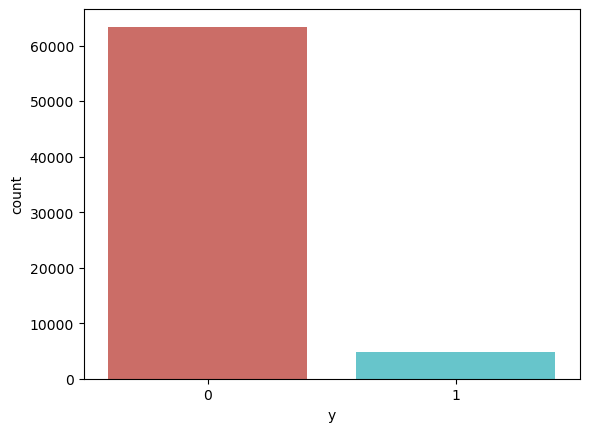

<Figure size 640x480 with 0 Axes>

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='y',data = dfdiff, palette = 'hls')
plt.show()
plt.savefig('count_plot')

In [ ]:
count_no_sub = len(data[data['y']==0])
count_sub = len(data[data['y']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

In [52]:
df.rename(columns = {'Fecha-I':'programada', 'Fecha-O':'operacion'}, inplace = True)
df["fecha_programada"] = (df["programada"].str.split(" ", n = 1, expand = True))[0]
df["hora_programada"] = (df["programada"].str.split(" ", n = 1, expand = True))[1]
df["fecha_operacion"] = (df["operacion"].str.split(" ", n = 1, expand = True))[0]
df["hora_operacion"] = (df["operacion"].str.split(" ", n = 1, expand = True))[1]
df["casuistica"] = np.where(df["fecha_programada"]  == df["fecha_operacion"] , np.where(df["hora_programada"]  == df["hora_operacion"] , 'match',  'no_match_hora')   , 'fecha_distinta' )
df["casuistica_dicotomica"] = df['casuistica'].apply(lambda x: x if x in ('no_match_hora', 'fecha_distinta') else 'match')
df.loc[(df['casuistica'] == 'no_match_hora') | (df['casuistica'] == 'fecha_distinta'), 'casuistica_dicotomica'] = 'no_match'  
df.head(10)
#df.to_csv(r'C:\Users\Diego Salcedo\Downloads\export.csv', index = False)

,programada,Vlo-I,Ori-I,Des-I,Emp-I,operacion,Vlo-O,Ori-O,Des-O,Emp-O,...,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,fecha_programada,hora_programada,fecha_operacion,hora_operacion,casuistica,casuistica_dicotomica
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,I,American Airlines,Santiago,Miami,2017-01-01,23:30:00,2017-01-01,23:33:00,no_match_hora,no_match
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,I,American Airlines,Santiago,Miami,2017-01-02,23:30:00,2017-01-02,23:39:00,no_match_hora,no_match
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,I,American Airlines,Santiago,Miami,2017-01-03,23:30:00,2017-01-03,23:39:00,no_match_hora,no_match
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,I,American Airlines,Santiago,Miami,2017-01-04,23:30:00,2017-01-04,23:33:00,no_match_hora,no_match
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,I,American Airlines,Santiago,Miami,2017-01-05,23:30:00,2017-01-05,23:28:00,no_match_hora,no_match
5,2017-01-06 23:30:00,226,SCEL,KMIA,AAL,2017-01-07 00:04:00,226,SCEL,KMIA,AAL,...,I,American Airlines,Santiago,Miami,2017-01-06,23:30:00,2017-01-07,00:04:00,fecha_distinta,no_match
6,2017-01-07 23:30:00,226,SCEL,KMIA,AAL,2017-01-07 23:25:00,226,SCEL,KMIA,AAL,...,I,American Airlines,Santiago,Miami,2017-01-07,23:30:00,2017-01-07,23:25:00,no_match_hora,no_match
7,2017-01-08 23:30:00,226,SCEL,KMIA,AAL,2017-01-08 23:25:00,226,SCEL,KMIA,AAL,...,I,American Airlines,Santiago,Miami,2017-01-08,23:30:00,2017-01-08,23:25:00,no_match_hora,no_match
8,2017-01-09 23:30:00,226,SCEL,KMIA,AAL,2017-01-10 00:10:00,226,SCEL,KMIA,AAL,...,I,American Airlines,Santiago,Miami,2017-01-09,23:30:00,2017-01-10,00:10:00,fecha_distinta,no_match
9,2017-01-11 23:30:00,226,SCEL,KMIA,AAL,2017-01-12 00:39:00,226,SCEL,KMIA,AAL,...,I,American Airlines,Santiago,Miami,2017-01-11,23:30:00,2017-01-12,00:39:00,fecha_distinta,no_match


In [8]:
df.casuistica.value_counts()

no_match_hora     63111
match              4789
fecha_distinta      306
Name: casuistica, dtype: int64

In [9]:
df.casuistica_dicotomica.value_counts()

no_match    63417
match        4789
Name: casuistica_dicotomica, dtype: int64

In [131]:
import datetime
from datetime import datetime


# convert string to date object
#df1['hora_programada'] = df1['hora_programada'].astype('datetime')
#df1['hora_operacion'] = df1['hora_operacion'].astype('datetime')
#df1["hora_programada"] = datetime.strptime(df1["hora_programada"], "%d/%m/%Y")
#df1["hora_operacion"] = datetime.strptime(df1["hora_operacion"], "%d/%m/%Y")
#df1["diferencia"] = abs((df1["hora_programada"] - df1["hora_operacion"]).days)
# Get the relativedelta between two dates
#df1["diferencia"] = relativedelta.relativedelta(df1["hora_programada"], df1["hora_operacion"])
##print('Years, Months, Days between two dates is')
##print(df1["diferencia"].years)

df1["hora_programada"] = df1.hora_programada.apply(lambda x: datetime.strptime(x,'%H:%M:%S'))
df1["hora_operacion"] = df1.hora_operacion.apply(lambda x: datetime.strptime(x,'%H:%M:%S'))
df1["diferencia_horas"] = df1["hora_programada"] - df1["hora_operacion"]


TypeError: strptime() argument 1 must be str, not Timestamp

In [ ]:
#df1["casuistica_dicotomica"] = np.where(df1["fecha_programada"]  == 'no match hora' | df1["fecha_programada"]  == 'fecha distinta', 'match')
#wine_df.loc[(wine_df.country == 'US') | (wine_df.price > 100)]
#df.loc[(df['casuistica'] != 'Bill') & (df['casuistica'] != 'Emma'), 'casuistica_dicotomica'] = 'match'
#df1["casuistica"] = np.where(df1["fecha_programada"]  == df1["fecha_operacion"] , 'mismo día', 'otro dia')
#df1['programada'] = df1['programada'].astype('str')
##df1.loc[(df1.casuistica == 'no match hora') & (df1.points > 90)]
#df1.loc[(df1.casuistica == 'no match hora') | (df1.casuistica > 'fecha distinta')]